In [2]:
import numpy as np
import soundfile as sf

# Define Jot's FDN Reverb - something's off!!

def fdn_reverb(input_signal, fs, rt60, n=4):
    # Define delay lengths (prime numbers for a more diffuse echo)
    delays = [113, 211, 307, 401]  # in samples

    # Calculate decay factors for 60dB decay
    gains = [10 ** (-3 * d / (fs * rt60)) for d in delays]

    # Initialize delay lines
    delay_lines = [np.zeros(d) for d in delays]

    # Initialize output signal
    output_signal = np.zeros_like(input_signal)

    # Define mixing matrix
    mixing_matrix = np.array([[0, 1, 1, -1], [-1, 0, 1, 1], [-1, -1, 0, 1], [1, -1, -1, 0]]) / np.sqrt(n)

    for i, x in enumerate(input_signal):
        # Get input for each delay line (matrix multiplication)
        inputs = mixing_matrix @ [dl[-1] for dl in delay_lines]

        # Update delay lines and get output
        for dl, g, u in zip(delay_lines, gains, inputs):
            output_signal[i] += g * dl[-1]
            dl = np.roll(dl, -1)
            dl[-1] = x + g * u

    return output_signal

# Load an audio file
source_signal, fs = sf.read('source.wav')

# Apply FDN Reverb
output_signal = fdn_reverb(source_signal, fs, rt60=1.2)  # rt60 is the reverb time in seconds

# Save the output audio file
sf.write('output.wav', output_signal, fs)

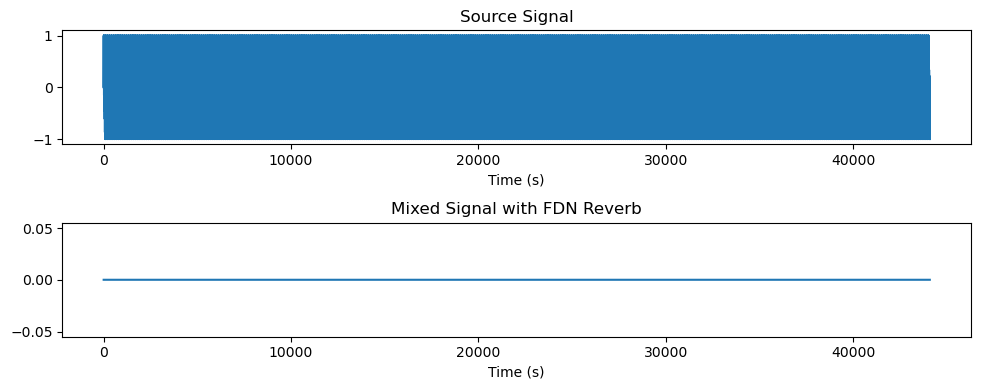

In [3]:
import matplotlib.pyplot as plt
# Plot the source signal and mixed signal
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(source_signal)
plt.title("Source Signal")
plt.xlabel("Time (s)")
plt.subplot(2, 1, 2)
plt.plot(output_signal)
plt.title("Mixed Signal with Jot Reverb")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()